## EX 03

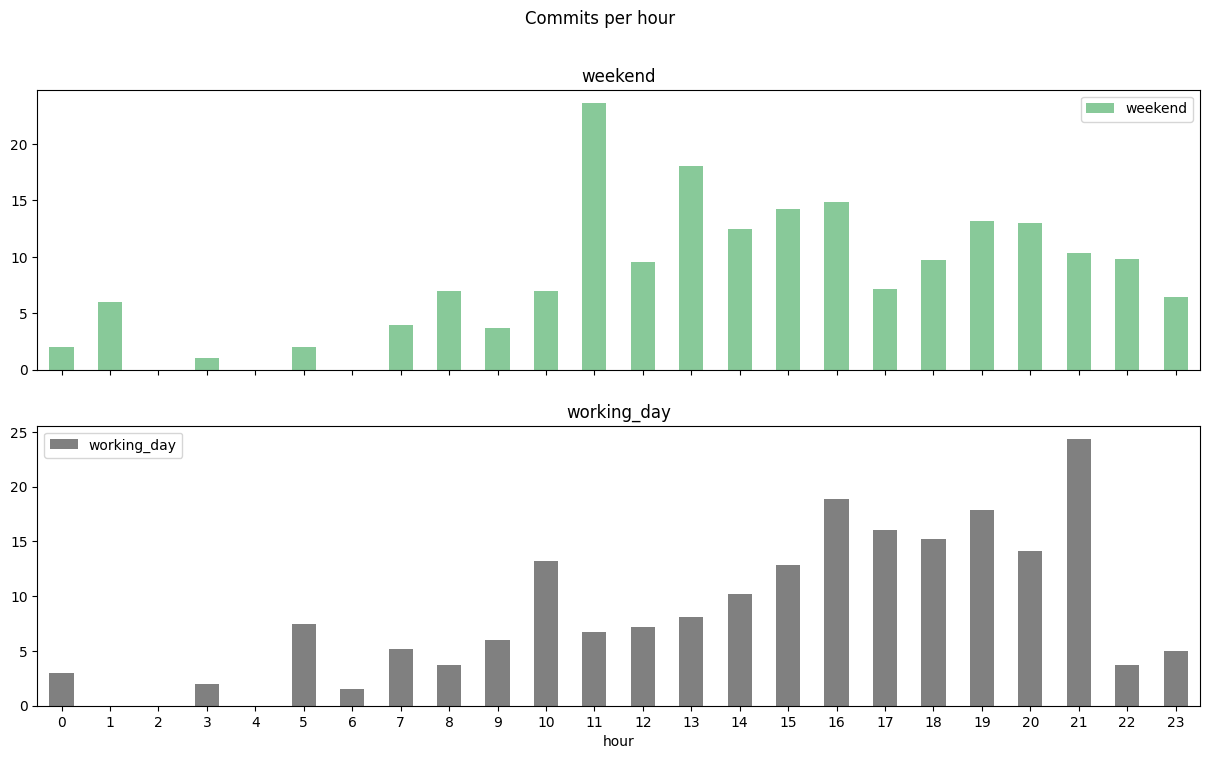

In [2]:
import pandas as pd
import sqlite3

# Подключение к базе
conn = sqlite3.connect("../data/checking-logs.sqlite")

# Загрузка данных без админов
query = """
SELECT timestamp
FROM checker
WHERE uid NOT LIKE 'admin%'
"""
df = pd.read_sql(query, conn)

# Обработка времени
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.weekday
df['date'] = df['timestamp'].dt.date

# Категория дня
df['day_type'] = df['weekday'].apply(lambda x: 'weekend' if x >= 5 else 'working_day')

# Считаем число коммитов по часам и датам
grouped = df.groupby(['day_type', 'date', 'hour']).size().reset_index(name='count')

# Среднее число коммитов по часам
avg = grouped.groupby(['day_type', 'hour'])['count'].mean().unstack('day_type')

# Убедимся, что все часы присутствуют
avg = avg.reindex(range(24), fill_value=0)

# Построение двух графиков друг под другом
plot = avg.plot(
    kind='bar',
    subplots=True,
    layout=(2, 1),
    figsize=(15, 8),
    legend=True,
    color=['#88c999', 'grey'],  # gray — рабочие дни, тускло-зелёный — выходные
    fontsize=10,
    title='Commits per hour',
    rot = 0
)

# Настройка легенд
plot[0][0].legend(['working_day'], loc='upper left')
plot[0][0].legend(['weekend'], loc='upper right');

**Различается ли динамика коммитов в рабочие и выходные дни?**

Ответ:

- Наибольшее количество коммитов в **рабочие дни** совершается в 21 час.
- Наибольшее количество коммитов в **выходные** совершается в 11 часов.
